# Installing all dependencies

In [ ]:
!pip install pydub
!sudo apt-get install p7zip-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


# Required Imports

In [ ]:
from pydub import AudioSegment
import wave
import contextlib
import glob
import shutil
import librosa
import concurrent.futures
import numpy as np
import pickle
import os

## Testing contextlib library and a function written to read an audio to get info for frames, rate and duration of a audio file

In [ ]:
def audio_file_props(path):
  with contextlib.closing(wave.open(path,'r')) as f:
      frames = f.getnframes()
      rate = f.getframerate()
      duration = frames / float(rate)
  return frames,rate,duration

In [ ]:
frames,rate,duration = audio_file_props("/content/sample_data/120_0.1_0.wav")
print(frames)
print(rate)
print(duration)

## Testing Pydub.Audiosegment method to read an audio file

In [ ]:
newAudio = AudioSegment.from_wav("/content/sample_data/120_0.1_0.wav")

## Function to convert an existing audio file to 1 second, clips if over 1 sec and adds silent frames if under one second

In [ ]:
def modify_audio(path,new_path):
  frames,rate,duration = audio_file_props(path)
  newAudio = AudioSegment.from_wav(path)

  if duration > 1:
      final_audio = newAudio[0:1000]

  elif duration < 1:
    missing = (1- duration)*1000
    missing_segment = AudioSegment.silent(duration=missing)
    final_audio = newAudio + missing_segment
  
  elif duration == 1:
    final_audio = newAudio
  
  final_audio.export(new_path, format="wav")

  return 'Done'


## This step is performed after uploading all audio files in zip format. This step involves creating a folder for each label to be extracted and stored

In [ ]:
import os
folders = ["False","await","else","import","pass","None","break","except","in","raise","True",
            "class","finally","is","return","and","continue","for","lambda","try","as","def",
            "from","nonlocal","while","assert","del","global","not","with","async","elif","if","or","yield"]

for folder in folders:
  os.mkdir("/content/"+folder)

## This step is extracting of audio files from zip files

In [ ]:
# "False","await","else","import","pass","None","break","except","in","raise","True",
# "class","finally","is","return","and","continue","for","lambda","try","as","def",
# "from","nonlocal","while","assert","del","global","not","with","async","elif","if","or","yield"


!7z x /content/drive/MyDrive/Dissertation_Datasets/False.zip -o/content/False/
!7z x /content/drive/MyDrive/Dissertation_Datasets/await.zip -o/content/await/
!7z x /content/drive/MyDrive/Dissertation_Datasets/else.zip -o/content/else/
!7z x /content/drive/MyDrive/Dissertation_Datasets/import.zip -o/content/import/
!7z x /content/drive/MyDrive/Dissertation_Datasets/pass.zip -o/content/pass/
!7z x /content/drive/MyDrive/Dissertation_Datasets/None.zip -o/content/None/
!7z x /content/drive/MyDrive/Dissertation_Datasets/break.zip -o/content/break/
!7z x /content/drive/MyDrive/Dissertation_Datasets/except.zip -o/content/except/
!7z x /content/drive/MyDrive/Dissertation_Datasets/in.zip -o/content/in/
!7z x /content/drive/MyDrive/Dissertation_Datasets/raise.zip -o/content/raise/
!7z x /content/drive/MyDrive/Dissertation_Datasets/True.zip -o/content/True/


!7z x /content/drive/MyDrive/Dissertation_Datasets/class.zip -o/content/class/
!7z x /content/drive/MyDrive/Dissertation_Datasets/finally.zip -o/content/finally/
!7z x /content/drive/MyDrive/Dissertation_Datasets/is.zip -o/content/is/
!7z x /content/drive/MyDrive/Dissertation_Datasets/return.zip -o/content/return/
!7z x /content/drive/MyDrive/Dissertation_Datasets/and.zip -o/content/and/
!7z x /content/drive/MyDrive/Dissertation_Datasets/continue.zip -o/content/continue/
!7z x /content/drive/MyDrive/Dissertation_Datasets/for.zip -o/content/for/
!7z x /content/drive/MyDrive/Dissertation_Datasets/lambda.zip -o/content/lambda/
!7z x /content/drive/MyDrive/Dissertation_Datasets/try.zip -o/content/try/
!7z x /content/drive/MyDrive/Dissertation_Datasets/as.zip -o/content/as/
!7z x /content/drive/MyDrive/Dissertation_Datasets/def.zip -o/content/def/



!7z x /content/drive/MyDrive/Dissertation_Datasets/from.zip -o/content/from/
!7z x /content/drive/MyDrive/Dissertation_Datasets/nonlocal.zip -o/content/nonlocal/
!7z x /content/drive/MyDrive/Dissertation_Datasets/while.zip -o/content/while/
!7z x /content/drive/MyDrive/Dissertation_Datasets/assert.zip -o/content/assert/
!7z x /content/drive/MyDrive/Dissertation_Datasets/del.zip -o/content/del/
!7z x /content/drive/MyDrive/Dissertation_Datasets/global.zip -o/content/global/
!7z x /content/drive/MyDrive/Dissertation_Datasets/not.zip -o/content/not/
!7z x /content/drive/MyDrive/Dissertation_Datasets/with.zip -o/content/with/
!7z x /content/drive/MyDrive/Dissertation_Datasets/async.zip -o/content/async/
!7z x /content/drive/MyDrive/Dissertation_Datasets/elif.zip -o/content/elif/
!7z x /content/drive/MyDrive/Dissertation_Datasets/if.zip -o/content/if/
!7z x /content/drive/MyDrive/Dissertation_Datasets/or.zip -o/content/or/
!7z x /content/drive/MyDrive/Dissertation_Datasets/yield.zip -o/content/yield/

##Create new folders for the audio files to be modified and stored

In [ ]:
for folder in folders:
  #shutil.rmtree("/content/sample_data/"+folder)
  os.mkdir("/content/sample_data/"+folder)
  

## In this step the modify_audio method is called and the files are stored in the corresponding label folders

In [ ]:
for folder in folders:
  current_command_files = glob.glob("/content/"+"/"+folder+"/"+folder+"/*.wav")

  for file in current_command_files:
    _,_,duration = audio_file_props(file)
    if duration <= 1.5:
      modify_audio(file,"/content/sample_data/"+folder+"/"+file.split('/')[-1])

In [ ]:
for folder in folders:
  shutil.rmtree("/content/"+folder)

## Resampling audio Files

In [ ]:
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

In [ ]:
duration_of_recordings=[]
for folder in folders:
    waves = [f for f in os.listdir("/content/sample_data/"+folder+"/") if f.endswith('.wav')]
    for wav in waves:
        _,_,duration = audio_file_props("/content/sample_data/"+folder+"/"+wav)
        duration_of_recordings.append(duration)

(array([  8946.,      0.,      0.,  16767.,      0.,      0.,  10530.,
             0.,      0., 379476.]),
 array([0.99986395, 0.99987755, 0.99989116, 0.99990476, 0.99991837,
        0.99993197, 0.99994558, 0.99995918, 0.99997279, 0.99998639,
        1.        ]),
 <a list of 10 Patch objects>)

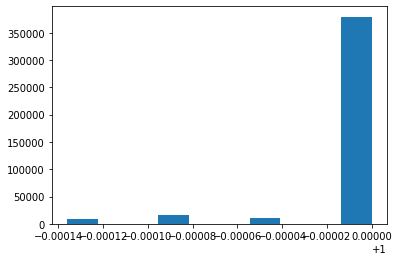

In [ ]:
plt.hist(np.array(duration_of_recordings))

In [ ]:
train_audio_path = "/content/sample_data/"

folders = ["False","await","else","import","pass","None","break","except","in","raise","True",
            "class","finally","is","return","and","continue","for","lambda","try","as","def",
            "from","nonlocal","while","assert","del","global","not","with","async","elif","if","or","yield"]

os.mkdir(train_audio_path + "/backup_command_level")


all_wave = []
all_label = []
all_filenames = []


for folder in folders:
    current_label_waves = []
    current_label_filenames = []
    waves = [f for f in os.listdir(train_audio_path + folder+"/") if f.endswith('.wav')]

    for wav in waves:
        _,_,duration = audio_file_props(train_audio_path + folder + '/' + wav)
        if duration == 1:
          samples, sample_rate = librosa.load(train_audio_path + folder + '/' + wav, sr = 16000)
          samples = librosa.resample(samples, sample_rate, 8000)
          if(len(samples)== 8000) : 
              all_wave.append(samples)
              all_label.append(folder)

              #Command level saving backup
              current_label_waves.append(samples)
              current_label_filenames.append(wav)
    with open(train_audio_path + "/backup_command_level/"+folder, 'wb') as f:
      pickle.dump({"current_label_waves":current_label_waves,"current_label_filenames":current_label_filenames}, f)
    print(folder)

False
await
else
import
pass
None
break
except
in
raise
True
class
finally
is
return
and
continue
for
lambda
try
as
def
from
nonlocal
while
assert
del
global
not
with
async
elif
if
or
yield


In [ ]:
# with open('/content/training_samples', 'wb') as f:
#     pickle.dump({"all_wave":all_wave,"all_label":all_label}, f)

In [ ]:
all_wave = []
all_label = []

folders = ["False","await","else","import","pass","None","break","except","in","raise","True",
            "class","finally","is","return","and","continue","for","lambda","try","as","def",
            "from","nonlocal","while","assert","del","global","not","with","async","elif","if","or","yield"]

for folder in folders:
  print(folder)
  with open('/content/sample_data/backup_command_level/'+folder, 'rb') as f:
      pickle_obj_dict = pickle.load(f)
      current_label_waves = pickle_obj_dict['current_label_waves']
      current_label_filenames = pickle_obj_dict['current_label_filenames']

      temp_current_wave = []
      for filename in current_label_filenames:
        if int(filename.split('_')[2].split('.')[0]) < 50:

          index = current_label_filenames.index(filename)
          temp_current_wave.append(current_label_waves[index])

      all_wave += temp_current_wave
      all_label += ([folder] * len(temp_current_wave))


False
await
else
import
pass
None
break
except
in
raise
True
class
finally
is
return
and
continue
for
lambda
try
as
def
from
nonlocal
while
assert
del
global
not
with
async
elif
if
or
yield


In [ ]:
len(all_label)

200898

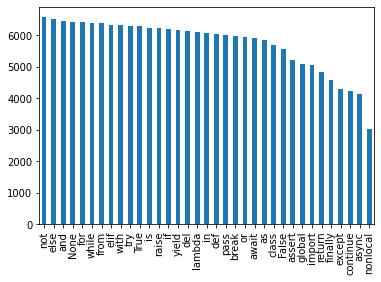

In [ ]:
import pandas as pd
df = pd.DataFrame({'freq': all_label})
df['freq'].value_counts().plot(kind='bar')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

NameError: ignored

In [ ]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(folders))

In [ ]:
all_wave = np.array(all_wave).reshape(-1,8000,1)

In [ ]:
del all_label

In [ ]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [ ]:
len(x_tr[0])
print(y_tr[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(folders), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2662, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 2662, 8)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 884, 16)           0     

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
history=model.fit(x_tr, y_tr ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

Epoch 1/100
5023/5023 [==============================] - 635s 123ms/step - loss: 2.1582 - accuracy: 0.3502 - val_loss: 0.4285 - val_accuracy: 0.8681
Epoch 2/100
5023/5023 [==============================] - 609s 121ms/step - loss: 0.6712 - accuracy: 0.7773 - val_loss: 0.1666 - val_accuracy: 0.9464
Epoch 3/100
5023/5023 [==============================] - 612s 122ms/step - loss: 0.4271 - accuracy: 0.8561 - val_loss: 0.1151 - val_accuracy: 0.9633
Epoch 4/100
5023/5023 [==============================] - 616s 123ms/step - loss: 0.3230 - accuracy: 0.8928 - val_loss: 0.0683 - val_accuracy: 0.9803
Epoch 5/100
5023/5023 [==============================] - 630s 125ms/step - loss: 0.2717 - accuracy: 0.9108 - val_loss: 0.0508 - val_accuracy: 0.9831
Epoch 6/100
5023/5023 [==============================] - 634s 126ms/step - loss: 0.2407 - accuracy: 0.9212 - val_loss: 0.0340 - val_accuracy: 0.9899
Epoch 7/100
5023/5023 [==============================] - 628s 125ms/step - loss: 0.2195 - accuracy: 0.9288

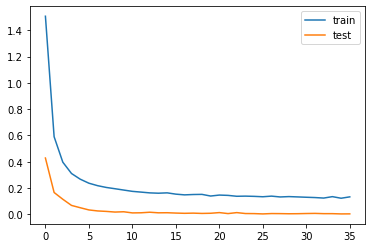

In [ ]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()

**Testing a sample from training**

In [ ]:
all_wave = np.array(x_tr[1]).reshape(-1,8000,1)

In [ ]:
y_prob = model.predict(all_wave)
y_classes = y_prob.argmax(axis=-1)
y_classes

array([14])

In [ ]:
print(classes[14])

else


## Predicting test samples i.e with voice ids > 50

In [ ]:
predict_wave = []
true_label = []

folders = ["False","await","else","import","pass","None","break","except","in","raise","True",
            "class","finally","is","return","and","continue","for","lambda","try","as","def",
            "from","nonlocal","while","assert","del","global","not","with","async","elif","if","or","yield"]

for folder in folders:
  print(folder)
  with open('/content/sample_data/backup_command_level/'+folder, 'rb') as f:
      pickle_obj_dict = pickle.load(f)
      current_label_waves = pickle_obj_dict['current_label_waves']
      current_label_filenames = pickle_obj_dict['current_label_filenames']

      temp_current_wave = []
      for filename in current_label_filenames:
        if int(filename.split('_')[2].split('.')[0]) >= 50:

          index = current_label_filenames.index(filename)
          temp_current_wave.append(current_label_waves[index])

      predict_wave += temp_current_wave
      true_label += ([folder] * len(temp_current_wave))

False
await
else
import
pass
None
break
except
in
raise
True
class
finally
is
return
and
continue
for
lambda
try
as
def
from
nonlocal
while
assert
del
global
not
with
async
elif
if
or
yield


In [ ]:
predict_wave = np.array(predict_wave).reshape(-1,8000,1)

In [ ]:
y_prob = model.predict(predict_wave)
y_classes = y_prob.argmax(axis=-1)


In [ ]:
y_classes = list(y_classes)

In [ ]:
y_classes_veb = [classes[x] for x in y_classes]

In [ ]:
classes_compared  = [i for i, j in zip(true_label, y_classes_veb) if str(i) == str(j)]

In [ ]:
count = 0
for i in range(0,len(y_classes_veb)):
  if y_classes_veb[i] == true_label[i]:
    count += 1

In [ ]:
accuracy = (count/len(y_classes_veb))*100
accuracy

68.33092542194447

## Fixing my audio chunks with padding

In [ ]:
frames,rate,duration = audio_file_props('/content/chunk0.wav')
newAudio = AudioSegment.from_wav('/content/chunk0.wav')

In [ ]:
duration

0.6940136054421768

In [ ]:
if duration > 1:
    final_audio = newAudio[0:1000]

In [ ]:
if duration < 1:
  missing = (1- duration)*1000
  missing_segment = AudioSegment.silent(duration=missing)
  final_audio = newAudio + missing_segment

In [ ]:
final_audio.export('/content/chunk0_modified.wav', format="wav")

<_io.BufferedRandom name='/content/chunk0_modified.wav'>

## Preprocessing new audio and predicting

In [ ]:
samples, sample_rate = librosa.load('/content/chunk0_modified.wav', sr = 16000)
samples = librosa.resample(samples, sample_rate, 8000)

In [ ]:
all_wave = np.array([samples]).reshape(-1,8000,1)

In [ ]:
y_prob = model.predict(all_wave)
y_classes = y_prob.argmax(axis=-1)
y_classes

array([7])

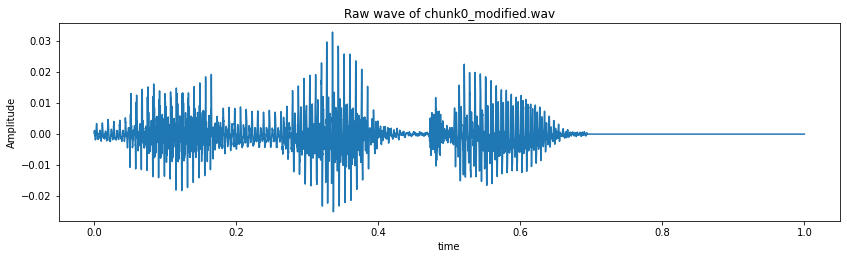

In [ ]:
train_audio_path = '/content/'
samples, sample_rate = librosa.load(train_audio_path+'chunk0_modified.wav', sr = 8000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + 'chunk0_modified.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

In [ ]:
len(np.linspace(0, sample_rate/len(samples), sample_rate))

8000

In [ ]:
samples, sample_rate = librosa.load(train_audio_path+'chunk0.wav', sr = 8000)

In [ ]:
len(samples)

5553